In [6]:
import numpy as np

fruits = np.load(r"C:\python_src\pandas-data-analysis\part7\data\fruits_300.npy")
fruits.shape

(300, 100, 100)

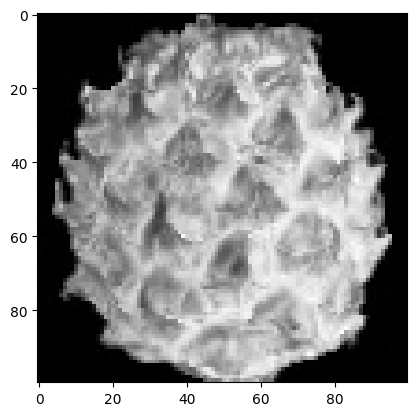

In [10]:
import matplotlib.pyplot as plt
plt.imshow(fruits[100], cmap='gray')
plt.show()

In [ ]:
# 19,148,192... -> 사진에서 밝은 부분
fruits[0,0,:]

array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   2,   1,   2,   2,   2,   2,   2,   2,   1,   1,
         1,   1,   1,   1,   1,   1,   2,   3,   2,   1,   2,   1,   1,
         1,   1,   2,   1,   3,   2,   1,   3,   1,   4,   1,   2,   5,
         5,   5,  19, 148, 192, 117,  28,   1,   1,   2,   1,   4,   1,
         1,   3,   1,   1,   1,   1,   1,   2,   2,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1], dtype=uint8)

In [15]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,random_state=42)

# 학습할 때 데이터의 형태는 **2차원** -> sklearn 계열 모두 ndim=2
f2d = fruits.reshape(300,100*100)
km.fit(f2d)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [16]:
km.labels_

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

In [17]:
km.cluster_centers_

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.10204082, 1.07142857, 1.10204082, ..., 1.        , 1.        ,
        1.        ],
       [1.01111111, 1.01111111, 1.01111111, ..., 1.        , 1.        ,
        1.        ]], shape=(3, 10000))

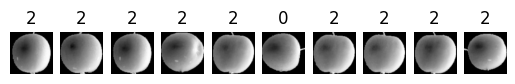

In [ ]:
import matplotlib.pyplot as plt

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(fruits[i],cmap='gray')
    plt.title(km.labels_[i])
plt.show()

# 중간에 0 -> 제대로 분류하지 못함

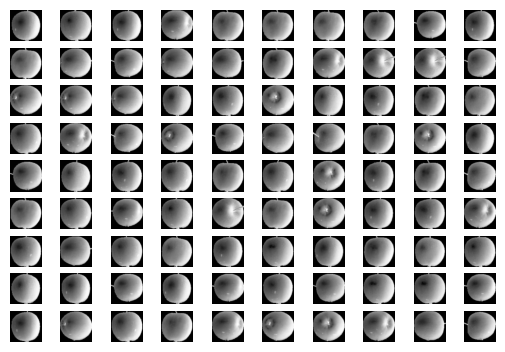

In [27]:
for i,apple in enumerate(fruits[km.labels_==2]):
    plt.subplot(10,10,i+1)
    plt.axis('off')
    plt.imshow(apple,cmap='gray')

##### 최적의 k 찾기
###### 엘보우(Elbow) 방법
- `inertia` 감소 폭을 시각적으로 관찰하는 방식
    - 1. 여러 개의 k 값에 대해 KMeans를 반복 학습
    - 2. 각 모델의 inertia_ 값을 저장
    - 3. k를 x축, inertia를 y축인 그래프
    - 4. 급격히 줄다가 완만해지는 지점(팔꿈치, elbow)
---
`.inertia_`<br>
- 클러스터의 **응집도**를 측정하는 성능지표
- 모든 data points가 자기가 속한 클러스터 중심까지의 거리 제곱합
- `inertia` 값이 작을수록 -> 클러스터 내부 응집도가 높다
- k를 늘릴수록 -> inertia는 무조건 작아짐
- 그래프에서 k가 증가하며, **inertia감소폭이 급격히 줄어드는 지점** => 적절한 k
- 거리기반, 평균, 이상치에 민감
- **스케일링 필수**

In [ ]:

km.inertia_

5075273831.931917

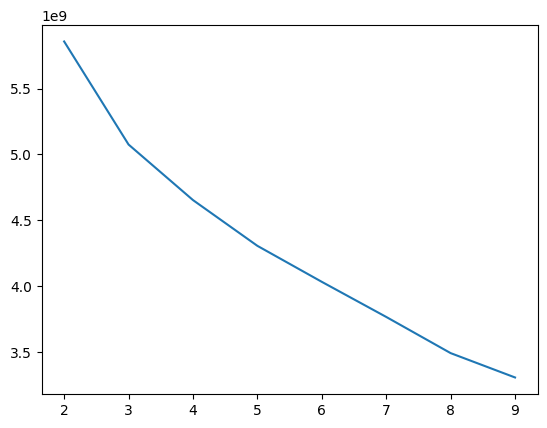

In [ ]:
inertia = []
for k in range(2,10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(f2d)
    inertia.append(km.inertia_)
plt.plot(range(2,10),inertia)

# k=3에서 급격히 꺾인다.